This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd #as discussed in class, pd is the common abbreviation for pandas in data science
import numpy as np #as discussed in class, np is the common abbreviation for numpy in data science

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [4]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv' #the url for dataset provided

chipo = pd.read_csv(url, sep = '\t') #chipo function: reads the data in the above url provided in csv text format

### Step 4. See the first 10 entries

In [5]:
chipo.head(10) #chipo calls our previous function and head pulls the number of entries specified from our dataset

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [8]:
# Solution 1
chipo.shape[0] #number of entries in our dataset


4622

In [10]:
# Solution 2

chipo.info() #another function to calculate number of entries or observations


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Step 6. What is the number of columns in the dataset?

In [12]:
chipo.shape[1] #function to calculate number of columns in dataset

5

### Step 7. Print the name of all the columns.

In [13]:
chipo.columns #columns function prints all column headers

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [14]:
chipo.index #index function provides information on how dataset is indexed

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

In [16]:
c = chipo.groupby('item_name') #select column with groupby function
c = c.sum() #function to sunm values
c = c.sort_values(['quantity'], ascending=False) #specify value to be quantity and ascending which is highest to lowest
c.head(1) #head function limits outpout to the number of rows specified, which is 1

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 10. For the most-ordered item, how many items were ordered?

In [17]:
c = chipo.groupby('item_name') #select column with groupby function
c = c.sum() #function to sunm values
c = c.sort_values(['quantity'], ascending=False) #specify value to be quantity and ascending which is highest to lowest
c.head(1) #head function limits outpout to the number of rows specified, which is 1
#number of items orderes was 761!

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 11. What was the most ordered item in the choice_description column?

In [21]:
c = chipo.groupby('choice_description').sum() #selected choice_description column to group data by and summed observations
c = c.sort_values(['quantity'], ascending=False) #sorted values from hightest to lowest
c.head(1) #head function limit output to the number of rows/observations specified, which is 1

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step 12. How many items were orderd in total?

In [22]:
total_items_orders = chipo.quantity.sum() #sum function of the quantity column in the dataset
total_items_orders

4972

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [23]:
chipo.item_price.dtype #function for type from item price column

dtype('O')

#### Step 13.b. Create a lambda function and change the type of item price

In [25]:
dollarizer = lambda x: float(x[1:-1]) #function to change type of item price
chipo.item_price = chipo.item_price.apply(dollarizer)

#### Step 13.c. Check the item price type

In [26]:
chipo.item_price.dtype #execute previous function created above

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [27]:
revenue = (chipo['quantity']* chipo['item_price']).sum() #function to sum the quantity times item price for each row

print('Revenue was: $' + str(np.round(revenue,2))) #print executes function

Revenue was: $39237.02


### Step 15. How many orders were made in the period?

In [28]:
orders = chipo.order_id.value_counts().count() #count function totals the number of data entries or orders
orders

1834

### Step 16. What is the average revenue amount per order?

In [29]:
# Solution 1

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [30]:
# Solution 2

chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

### Step 17. How many different items are sold?

In [31]:
chipo.item_name.value_counts().count() #count function to count number of item names

50

### Introduction:

This exercise was inspired by this [page](http://chrisalbon.com/python/)

Special thanks to: https://github.com/chrisalbon for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [50]:
import pandas as pd #pd is the common shorthand for pandas

### Step 2. This is the data given as a dictionary

In [51]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

### Step 3. Create a dataframe and assign it to a variable called army. 

#### Don't forget to include the columns names in the order presented in the dictionary ('regiment', 'company', 'deaths'...) so that the column index order is consistent with the solutions. If omitted, pandas will order the columns alphabetically.

In [52]:
army = pd.DataFrame(data=raw_data)
army

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters,origin
0,Nighthawks,1st,523,5,1045,1,1,1,4,Arizona
1,Nighthawks,1st,52,42,957,5,2,0,24,California
2,Nighthawks,2nd,25,2,1099,62,3,1,31,Texas
3,Nighthawks,2nd,616,2,1400,26,3,1,2,Florida
4,Dragoons,1st,43,4,1592,73,2,0,3,Maine
5,Dragoons,1st,234,7,1006,37,1,1,4,Iowa
6,Dragoons,2nd,523,8,987,949,2,0,24,Alaska
7,Dragoons,2nd,62,3,849,48,3,1,31,Washington
8,Scouts,1st,62,4,973,48,2,0,2,Oregon
9,Scouts,1st,73,7,1005,435,1,0,3,Wyoming


### Step 4. Set the 'origin' colum as the index of the dataframe

In [53]:
army.set_index('origin', inplace=True)

### Step 5. Print only the column veterans

In [54]:
army.veterans

origin
Arizona         1
California      5
Texas          62
Florida        26
Maine          73
Iowa           37
Alaska        949
Washington     48
Oregon         48
Wyoming       435
Louisana       63
Georgia       345
Name: veterans, dtype: int64

### Step 6. Print the columns 'veterans' and 'deaths'

In [55]:
army[["veterans", "deaths"]]

,veterans,deaths
origin,,
Arizona,1,523
California,5,52
Texas,62,25
Florida,26,616
Maine,73,43
Iowa,37,234
Alaska,949,523
Washington,48,62
Oregon,48,62


### Step 7. Print the name of all the columns.

In [56]:
army.columns

Index(['regiment', 'company', 'deaths', 'battles', 'size', 'veterans',
       'readiness', 'armored', 'deserters'],
      dtype='object')

### Step 8. Select the 'deaths', 'size' and 'deserters' columns from Maine and Alaska

In [57]:
army.loc[["Maine", "Alaska"], ["deaths", "size", "deserters"]]

,deaths,size,deserters
origin,,,
Maine,43,1592,3
Alaska,523,987,24


### Step 9. Select the rows 3 to 7 and the columns 3 to 6

In [58]:
army.iloc[2:7, 2:6]

,deaths,battles,size,veterans
origin,,,,
Texas,25,2,1099,62
Florida,616,2,1400,26
Maine,43,4,1592,73
Iowa,234,7,1006,37
Alaska,523,8,987,949


### Step 10. Select every row after the fourth row and all columns

In [59]:
army.iloc[4:, :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 11. Select every row up to the 4th row and all columns

In [60]:
army.iloc[:4, :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2


### Step 12. Select the 3rd column up to the 7th column

In [61]:
army.iloc[:, 2:7]

,deaths,battles,size,veterans,readiness
origin,,,,,
Arizona,523,5,1045,1,1
California,52,42,957,5,2
Texas,25,2,1099,62,3
Florida,616,2,1400,26,3
Maine,43,4,1592,73,2
Iowa,234,7,1006,37,1
Alaska,523,8,987,949,2
Washington,62,3,849,48,3
Oregon,62,4,973,48,2


### Step 13. Select rows where df.deaths is greater than 50

In [62]:
army[army["deaths"] > 50]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3


### Step 14. Select rows where df.deaths is greater than 500 or less than 50

In [63]:
army[(army["deaths"] > 500) | (army["deaths"] < 50)]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 15. Select all the regiments not named "Dragoons"

In [64]:
army[army["regiment"] != "Dragoons"]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 16. Select the rows called Texas and Arizona

In [65]:
army.loc[["Texas", "Arizona"], :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4


### Step 17. Select the third cell in the row named Arizona

In [66]:
army.loc[["Arizona"]].iloc[:, 2]

origin
Arizona    523
Name: deaths, dtype: int64

### Step 18. Select the third cell down in the column named deaths

In [67]:
army.loc[:, ["deaths"]].iloc[2]

deaths    25
Name: Texas, dtype: int64

### Introduction:

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [68]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users.

In [65]:
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### Step 4. Discover what is the mean age per occupation

In [66]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [150]:
# create a function
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

# apply the function to the gender column and create a new column
users['gender_n'] = users['gender'].apply(gender_to_numeric)


a = users.groupby('occupation').gender_n.sum() / users.occupation.value_counts() * 100 

# sort to the most male 
a.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

### Step 6. For each occupation, calculate the minimum and maximum ages

In [151]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


### Step 7. For each combination of occupation and gender, calculate the mean age

In [152]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### Step 8.  For each occupation present the percentage of women and men

In [154]:
# create a data frame and apply count to gender
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

# create a DataFrame and apply count for each occupation
occup_count = users.groupby(['occupation']).agg('count')

# divide the gender_ocup per the occup_count and multiply per 100
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100

# present all rows from the 'gender column'
occup_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# United States - Crime Rates - 1960 - 2014

### Introduction:

This time you will create a data 

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [95]:
import numpy as np
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

### Step 3. Assign it to a variable called crime.

In [265]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv"
crime = pd.read_csv(url)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 4. What is the type of the columns?

In [266]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null int64
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(12)
memory usage: 5.2 KB


##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [267]:
# pd.to_datetime(crime)
crime.Year = pd.to_datetime(crime.Year, format='%Y')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null datetime64[ns]
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.2 KB


### Step 6. Set the Year column as the index of the dataframe

In [268]:
crime = crime.set_index('Year', drop = True)
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 7. Delete the Total column

In [269]:
del crime['Total']
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [270]:
# To learn more about .resample (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)
# To learn more about Offset Aliases (http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

# Uses resample to sum each decade
crimes = crime.resample('10AS').sum()

# Uses resample to get the max value only for the "Population" column
population = crime['Population'].resample('10AS').max()

# Updating the "Population" column
crimes['Population'] = population

crimes

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
1960,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


### Step 9. What is the most dangerous decade to live in the US?

In [276]:
# apparently the 90s was a pretty dangerous time in the US
crime.idxmax(0)

Population            2010
Violent               1990
Property              1990
Murder                1990
Forcible_Rape         1990
Robbery               1990
Aggravated_assault    1990
Burglary              1980
Larceny_Theft         1990
Vehicle_Theft         1990
dtype: int64

# Fictitious Names

### Introduction:

This time you will create a data again 

Special thanks to [Chris Albon](http://chrisalbon.com/) for sharing the dataset and materials.
All the credits to this exercise belongs to him.  

In order to understand about it go to [here](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/).

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Create the 3 DataFrames based on the following raw data

In [2]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### Step 3. Assign each to a variable called data1, data2, data3

In [12]:
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


### Step 4. Join the two dataframes along rows and assign all_data

In [9]:
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


### Step 5. Join the two dataframes along columns and assing to all_data_col

In [10]:
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


### Step 6. Print data3

In [13]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


### Step 7. Merge all_data and data3 along the subject_id value

In [15]:
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


### Step 8. Merge only the data that has the same 'subject_id' on both data1 and data2

In [16]:
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


### Step 9. Merge all values in data1 and data2, with matching records from both sides where available.

In [17]:
pd.merge(data1, data2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


# US - Baby Names

### Introduction:

We are going to use a subset of [US Baby Names](https://www.kaggle.com/kaggle/us-baby-names) from Kaggle.  
In the file it will be names from 2004 until 2014


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv). 

### Step 3. Assign it to a variable called baby_names.

In [2]:
baby_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


### Step 4. See the first 10 entries

In [3]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


### Step 5. Delete the column 'Unnamed: 0' and 'Id'

In [4]:
# deletes Unnamed: 0
del baby_names['Unnamed: 0']

# deletes Unnamed: 0
del baby_names['Id']

baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


### Step 6. Are there more male or female names in the dataset?

In [5]:
baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

### Step 7. Group the dataset by name and assign to names

In [6]:
# you don't want to sum the Year column, so you delete it
del baby_names["Year"]

# group the data
names = baby_names.groupby("Name").sum()

# print the first 5 observations
names.head()

# print the size of the dataset
print(names.shape)

# sort it from the biggest value to the smallest one
names.sort_values("Count", ascending = 0).head()

(17632, 1)


,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798


### Step 8. How many different names exist in the dataset?

In [7]:
# as we have already grouped by the name, all the names are unique already. 
# get the length of names
len(names)

17632

### Step 9. What is the name with most occurrences?

In [8]:
names.Count.idxmax()

# OR

# names[names.Count == names.Count.max()]

'Jacob'

### Step 10. How many different names have the least occurrences?

In [9]:
len(names[names.Count == names.Count.min()])

2578

### Step 11. What is the median name occurrence?

In [10]:
names[names.Count == names.Count.median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
Antonina,49
Aveline,49
Aziah,49
Baily,49


### Step 12. What is the standard deviation of names?

In [11]:
names.Count.std()

11006.069467891111

### Step 13. Get a summary with the mean, min, max, std and quartiles.

In [12]:
names.describe()

,Count
count,17632.000000
mean,2008.932169
std,11006.069468
min,5.000000
25%,11.000000
50%,49.000000
75%,337.000000
max,242874.000000


# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv) 

### Step 3. Assign it to a variable titanic 

In [4]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Titanic_Desaster/train.csv'

titanic = pd.read_csv(url)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

In [5]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

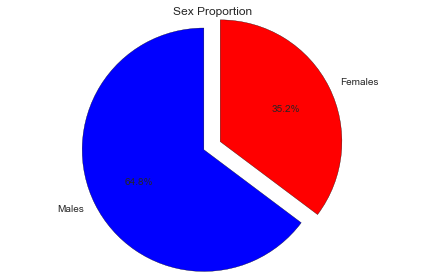

In [24]:
# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

(-5, 85)

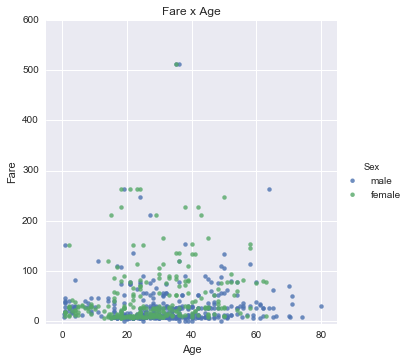

In [67]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

### Step 7. How many people survived?

In [68]:
titanic.Survived.sum()

342

### Step 8. Create a histogram with the Fare payed

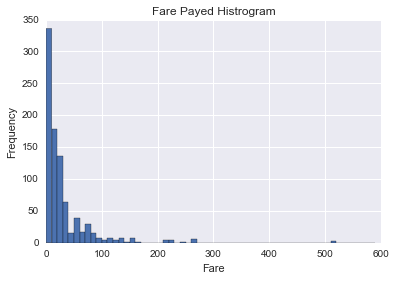

In [48]:
# sort the values from the top to the least value and slice the first 5 items
df = titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

### BONUS: Create your own question and answer it.

# Pokemon

### Introduction:

This time you will create the data.



### Step 1. Import the necessary libraries

In [2]:
import pandas as pd

### Step 2. Create a data dictionary

In [3]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### Step 3. Assign it to a variable called pokemon

In [5]:
pokemon = pd.DataFrame(raw_data)
pokemon.head()

,evolution,hp,name,pokedex,type
0,Ivysaur,45,Bulbasaur,yes,grass
1,Charmeleon,39,Charmander,no,fire
2,Wartortle,44,Squirtle,yes,water
3,Metapod,45,Caterpie,no,bug


### Step 4. Ops...it seems the DataFrame columns are in alphabetical order. Place  the order of the columns as name, type, hp, evolution, pokedex

In [8]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution','pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### Step 5. Add another column called place, and insert what you have in mind.

In [13]:
pokemon['place'] = ['park','street','lake','forest']
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,park
1,Charmander,fire,39,Charmeleon,no,street
2,Squirtle,water,44,Wartortle,yes,lake
3,Caterpie,bug,45,Metapod,no,forest


### Step 6. Present the type of each column

In [9]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
dtype: object

### BONUS: Create your own question and answer it.

# Getting Financial Data - Google Finance

### Introduction:

This time you will get data from a website.


### Step 1. Import the necessary libraries

In [30]:
import pandas as pd

# package to extract data from various Internet sources into a DataFrame
# make sure you have it installed
from pandas_datareader import data, wb

# package for dates
import datetime as dt

### Step 2. Create your time range (start and end variables). The start date should be 01/01/2015 and the end should today (whatever your today is)

In [75]:
start = dt.datetime(2015, 1, 1)

end = dt.datetime.today()

start

datetime.datetime(2015, 1, 1, 0, 0)

### Step 3. Select the Apple, Tesla, Twitter, IBM, LinkedIn stocks symbols and assign them to a variable called stocks

In [76]:
stocks = ['AAPL', 'TSLA', 'IBM', 'LNKD']

### Step 4. Read the data from google, assign to df and print it

In [77]:
df = web.DataReader(stocks, 'google', start, end)
df

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 399 (major_axis) x 4 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2015-01-02 00:00:00 to 2016-08-02 00:00:00
Minor_axis axis: AAPL to TSLA

### Step 5.  What is the type of structure of df ?

In [ ]:
# 'pandas.core.panel.Panel'

### Step 6. Print all the Items axis values
#### To learn more about the Panel structure go to [documentation](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#panel) 

In [120]:
df.items

Index([u'Open', u'High', u'Low', u'Close', u'Volume'], dtype='object')

### Step 7. Good, now we know  the data avaiable. Create a dataFrame called vol, with the Volume values.

In [122]:
vol = df['Volume']
vol.head()

,AAPL,IBM,LNKD,TSLA
Date,,,,
2015-01-02,53204626.0,5525466.0,1203743.0,4764443.0
2015-01-05,64285491.0,4880389.0,1400562.0,5368477.0
2015-01-06,65797116.0,6146712.0,2006546.0,6261936.0
2015-01-07,40105934.0,4701839.0,985016.0,2968390.0
2015-01-08,59364547.0,4241113.0,1293955.0,3442509.0


### Step 8. Aggregate the data of Volume to weekly
#### Hint: Be careful to not sum data from the same week of 2015 and other years.

In [132]:
vol['week'] = vol.index.week
vol['year'] = vol.index.year

week = vol.groupby(['week','year']).sum()
week.head()

AAPL         IBM       LNKD        TSLA
week year                                                
1    2015   53204626.0   5525466.0  1203743.0   4764443.0
     2016  343422014.0  25233098.0  6630485.0  20967926.0
2    2015  283252615.0  24458400.0  7203125.0  22709607.0
     2016  302072797.0  29379214.0  9160521.0  22997290.0
3    2015  304226647.0  23263206.0  7084168.0  30799137.0

### Step 9. Find all the volume traded in the year of 2015

In [131]:
del vol['week']
vol['year'] = vol.index.year

year = vol.groupby(['year']).sum()
year

,AAPL,IBM,LNKD,TSLA
year,,,,
2015,1.301994e+10,1.100959e+09,440376163.0,1.085839e+09
2016,6.081474e+09,6.585250e+08,453233878.0,7.540962e+08


### BONUS: Create your own question and answer it.

# Wine

### Introduction:

This exercise is a adaptation from the UCI Wine dataset.
The only pupose is to practice deleting data with pandas.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data). 

### Step 3. Assign it to a variable called wine

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url)

wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### Step 4. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [4]:
wine = wine.drop(wine.columns[[0,3,6,8,11,12,13]], axis = 1)

wine.head()

,14.23,1.71,15.6,127,3.06,2.29,5.64
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


### Step 5. Assign the columns as below:

The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [5]:
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


### Step 6. Set the values of the first 3 rows from alcohol as NaN

In [6]:
wine.iloc[0:3, 0] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100,2.76,1.28,4.38
1,NaN,2.36,18.6,101,3.24,2.81,5.68
2,NaN,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


### Step 7. Now set the value of the rows 3 and 4 of magnesium as NaN

In [7]:
wine.iloc[2:4, 3] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,4.38
1,NaN,2.36,18.6,101.0,3.24,2.81,5.68
2,NaN,1.95,16.8,NaN,3.49,2.18,7.80
3,13.24,2.59,21.0,NaN,2.69,1.82,4.32
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75


### Step 8. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [8]:
wine.alcohol.fillna(10, inplace = True)

wine.magnesium.fillna(100, inplace = True)

wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.78,11.2,100.0,2.76,1.28,4.38
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
2,10.00,1.95,16.8,100.0,3.49,2.18,7.80
3,13.24,2.59,21.0,100.0,2.69,1.82,4.32
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75


### Step 9. Count the number of missing values

In [9]:
wine.isnull().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### Step 10.  Create an array of 10 random numbers up until 10

In [10]:
random = np.random.randint(10, size = 10)
random

array([2, 3, 0, 5, 0, 9, 4, 0, 7, 2])

### Step 11.  Use random numbers you generated as an index and assign NaN value to each of cell.

In [11]:
wine.alcohol[random] = np.nan
wine.head(10)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,4.38
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
2,NaN,1.95,16.8,100.0,3.49,2.18,7.80
3,NaN,2.59,21.0,100.0,2.69,1.82,4.32
4,NaN,1.76,15.2,112.0,3.39,1.97,6.75
5,NaN,1.87,14.6,96.0,2.52,1.98,5.25
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
7,NaN,1.64,14.0,97.0,2.98,1.98,5.20
8,13.86,1.35,16.0,98.0,3.15,1.85,7.22
9,NaN,2.16,18.0,105.0,3.32,2.38,5.75


### Step 12.  How many missing values do we have?

In [12]:
wine.isnull().sum()

alcohol              7
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### Step 13. Delete the rows that contain missing values

In [13]:
wine = wine.dropna(axis = 0, how = "any")
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
8,13.86,1.35,16.0,98.0,3.15,1.85,7.22
10,14.12,1.48,16.8,95.0,2.43,1.57,5.00
11,13.75,1.73,16.0,89.0,2.76,1.81,5.60


### Step 14. Print only the non-null values in alcohol

In [14]:
mask = wine.alcohol.notnull()
mask

1      True
6      True
8      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
       ... 
147    True
148    True
149    True
150    True
151    True
152    True
153    True
154    True
155    True
156    True
157    True
158    True
159    True
160    True
161    True
162    True
163    True
164    True
165    True
166    True
167    True
168    True
169    True
170    True
171    True
172    True
173    True
174    True
175    True
176    True
Name: alcohol, dtype: bool

In [15]:
wine.alcohol[mask]

1      10.00
6      14.06
8      13.86
10     14.12
11     13.75
12     14.75
13     14.38
14     13.63
15     14.30
16     13.83
17     14.19
18     13.64
19     14.06
20     12.93
21     13.71
22     12.85
23     13.50
24     13.05
25     13.39
26     13.30
27     13.87
28     14.02
29     13.73
30     13.58
31     13.68
32     13.76
33     13.51
34     13.48
35     13.28
36     13.05
       ...  
147    13.32
148    13.08
149    13.50
150    12.79
151    13.11
152    13.23
153    12.58
154    13.17
155    13.84
156    12.45
157    14.34
158    13.48
159    12.36
160    13.69
161    12.85
162    12.96
163    13.78
164    13.73
165    13.45
166    12.82
167    13.58
168    13.40
169    12.20
170    12.77
171    14.16
172    13.71
173    13.40
174    13.27
175    13.17
176    14.13
Name: alcohol, dtype: float64

### Step 15.  Reset the index, so it starts with 0 again

In [16]:
wine = wine.reset_index(drop = True)
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,2.36,18.6,101.0,3.24,2.81,5.68
1,14.06,2.15,17.6,121.0,2.51,1.25,5.05
2,13.86,1.35,16.0,98.0,3.15,1.85,7.22
3,14.12,1.48,16.8,95.0,2.43,1.57,5.00
4,13.75,1.73,16.0,89.0,2.76,1.81,5.60


### BONUS: Create your own question and answer it.